# Throughout history, nothing has killed more human beings than infectious disease. Covid-19 is climbing up the same ladder.

The following is an analysis of covid-19. This analysis will address some of the questions which everyone should be aware of.

The summary of this notebook/kernel:

* A graph showing confirmed cases with time across all the countries.
* Countries with maximum deaths.
* Countries which are successfully fighting against covid-19.(comparing the ratios of confirmed cases by recovered cases.)
* Pattern of rising cases in India.
* Comparision of confirmed, recovered and death curves.

In [1]:
# Importing the necessary libraries.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# reading the data from the repository. 

location = "../input/covid19dataset/COVID_Data_Basic.csv"
data = pd.read_csv(location)
data

,Unnamed: 0,Country,Date,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered
0,1,Afghanistan,2019-12-31,0,0,0,0,0,0
1,2,Afghanistan,2020-01-01,0,0,0,0,0,0
2,3,Afghanistan,2020-01-02,0,0,0,0,0,0
3,4,Afghanistan,2020-01-03,0,0,0,0,0,0
4,5,Afghanistan,2020-01-04,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
18022,18311,Zimbabwe,2020-04-25,31,4,2,2,0,0
18023,18312,Zimbabwe,2020-04-26,31,4,2,0,0,0
18024,18313,Zimbabwe,2020-04-27,32,4,5,1,0,3
18025,18314,Zimbabwe,2020-04-28,32,4,5,0,0,0


# Data Cleaning: 

In [3]:
# Looking at the key features of our dataset.

data.describe()

,Unnamed: 0,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered
count,18027.000000,1.802700e+04,18027.000000,18027.000000,18027.000000,18027.000000,18027.000000
mean,20154.148111,3.911102e+03,249.740500,1025.597493,177.168969,12.627670,53.958063
std,27253.887726,3.140892e+04,2149.889829,7357.314427,1397.766244,103.891511,428.253667
min,1.000000,0.000000e+00,0.000000,0.000000,-2510.000000,-31.000000,-849.000000
25%,4507.500000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9014.000000,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17386.500000,2.175000e+02,3.000000,16.000000,12.000000,0.000000,0.000000
max,178110.000000,1.039909e+06,60967.000000,132929.000000,36188.000000,2612.000000,22019.000000


In [4]:
#Checking the datatypes of each column.

data.dtypes

Unnamed: 0       int64
Country         object
Date            object
Confirmed        int64
Death            int64
Recovered        int64
newConfirmed     int64
newDeath         int64
newRecovered     int64
dtype: object

Since the "Date" is in object datatype, we need to convert it. 

In [5]:
# Converting the datatype of Date to datatime format. 

data["Date"] = pd.to_datetime(data["Date"])

In [6]:
# Cross-checking whether we got the required datatype.

data.dtypes

Unnamed: 0               int64
Country                 object
Date            datetime64[ns]
Confirmed                int64
Death                    int64
Recovered                int64
newConfirmed             int64
newDeath                 int64
newRecovered             int64
dtype: object

In [7]:
# Checking for null values.

data.isnull().any()

Unnamed: 0      False
Country         False
Date            False
Confirmed       False
Death           False
Recovered       False
newConfirmed    False
newDeath        False
newRecovered    False
dtype: bool

In [8]:
# Checking for india's data. 

data["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guyana', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Irelan

Yes, India is there. Few countries seem to be missing from the dataset. So, it's good to cross-check. 

We will do country specific analysis on India.

But before that we will do some global analysis.

# Global_analysis on confirmed cases with time. 

In [9]:
# Creating a dataframe with required features.

data_date = data.groupby("Date", as_index=False).Confirmed.sum()
data_date


,Date,Confirmed
0,2019-12-31,27
1,2020-01-01,27
2,2020-01-02,27
3,2020-01-03,44
4,2020-01-04,44
...,...,...
116,2020-04-25,2897624
117,2020-04-26,2972363
118,2020-04-27,3041764
119,2020-04-28,3116398


In [10]:
# Looking at the datatypes.(in case they need to be astyped)

data_date.dtypes

Date         datetime64[ns]
Confirmed             int64
dtype: object

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([737425., 737439., 737456., 737470., 737485., 737499., 737516.,
        737530., 737546.]),
 <a list of 9 Text major ticklabel objects>)

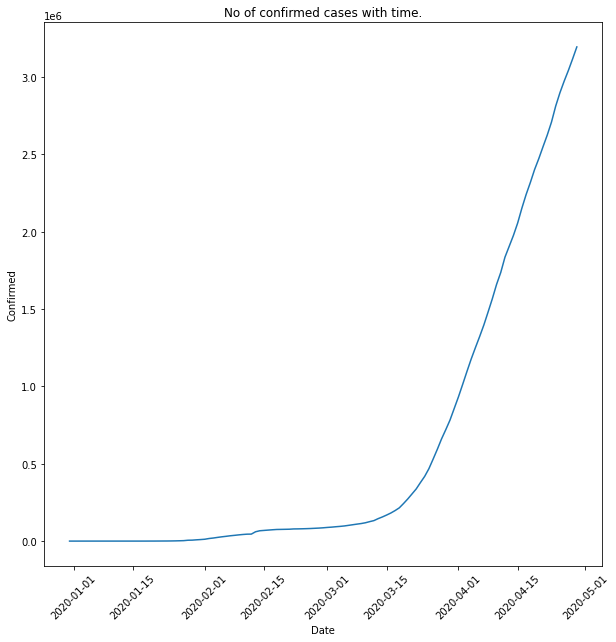

In [11]:
# Creating a line-graph with above data.

plt.figure(figsize=(10,10))
sns.lineplot(x=data_date["Date"], y=data_date["Confirmed"])
plt.title("No of confirmed cases with time.")
plt.xticks(rotation=45)

We see a steep rise in no of cases with time across all countries.

# Countries with maximum death cases.

In [12]:
# Creating a dataframe with the neccesary features/columns.

data_death = data.groupby("Country", as_index=False).Death.max()
data_death

,Country,Death
0,Afghanistan,60
1,Albania,30
2,Algeria,444
3,Andorra,42
4,Angola,2
...,...,...
184,West Bank and Gaza,4
185,Western Sahara,0
186,Yemen,0
187,Zambia,3


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 <a list of 8 Text major ticklabel objects>)

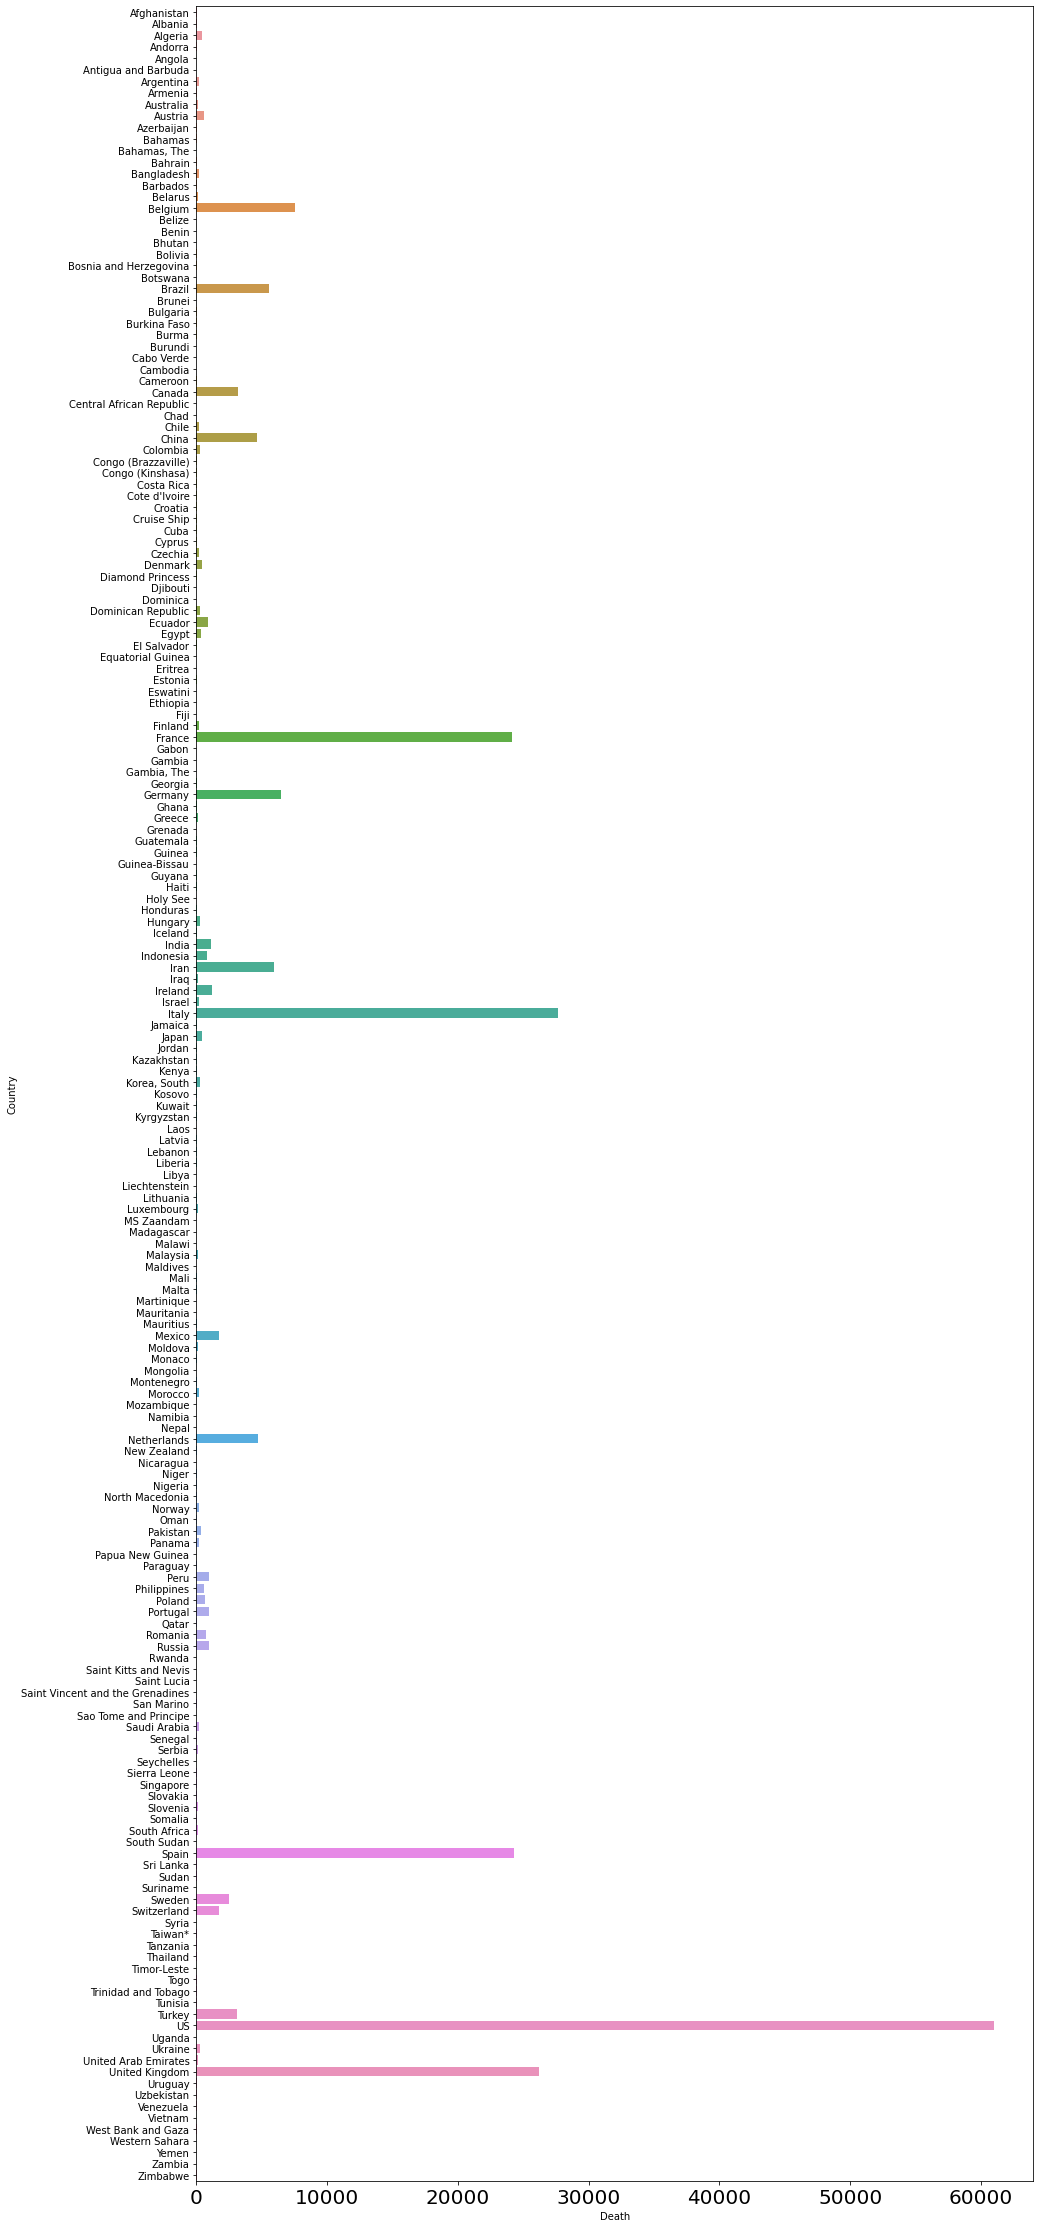

In [13]:
# plotting a bargraph with the above dataframe. 

plt.figure(figsize=(15,40))
sns.barplot(x=data_death["Death"], y=data_death["Country"])
plt.yticks(size=10)
plt.xticks(size=20)

US is seen as the country with the highest death cases. Followed by Italy and Spain.

To make thing a bit easier to visualize, we consider the top 10 affected countries and plot the values ina similar graph.

In [14]:
# Creating a dataframe of top 10 countries.

death = data_death.sort_values(by="Death", ascending=False)
death_top10 = death.head(10)
death_top10

,Country,Death
175,US,60967
87,Italy,27682
179,United Kingdom,26166
160,Spain,24275
63,France,24121
17,Belgium,7501
68,Germany,6467
83,Iran,5957
24,Brazil,5513
124,Netherlands,4727


So, here we get the top countries with the most death cases.

Text(0.5, 1.0, 'top countries with the most death cases')

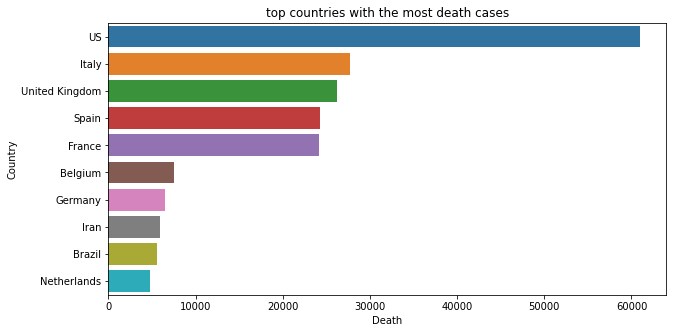

In [15]:
# plotting a bargraph with the above dataframe.

plt.figure(figsize=(10,5))
sns.barplot(x=death_top10["Death"], y=death_top10["Country"])
plt.title("top countries with the most death cases")

Now, things are more clean and clear.

#  Countries who are successfully fighting against covid-19:

We need to create a dataframe with the necessary features/columns.

In [16]:
# Creating a dataframe of countries vs recovered cases.

data_recover = data.groupby("Country", as_index=False).Recovered.max()
data_recover

,Country,Recovered
0,Afghanistan,252
1,Albania,455
2,Algeria,1702
3,Andorra,423
4,Angola,7
...,...,...
184,West Bank and Gaza,92
185,Western Sahara,5
186,Yemen,1
187,Zambia,54


In [17]:
# Creating a dataframe of countries vs confirmed cases.

data_confirmed = data.groupby("Country", as_index=False).Confirmed.max()
data_confirmed

,Country,Confirmed
0,Afghanistan,1939
1,Albania,766
2,Algeria,3848
3,Andorra,743
4,Angola,27
...,...,...
184,West Bank and Gaza,484
185,Western Sahara,6
186,Yemen,6
187,Zambia,97


To know which country is performing better, we need to compare their ratios of deaths is to recoveries.

In [18]:
# Merging the above 2 Dataframes.
data_fight = pd.merge(data_recover, data_confirmed, on='Country')
data_fight

,Country,Recovered,Confirmed
0,Afghanistan,252,1939
1,Albania,455,766
2,Algeria,1702,3848
3,Andorra,423,743
4,Angola,7,27
...,...,...,...
184,West Bank and Gaza,92,484
185,Western Sahara,5,6
186,Yemen,1,6
187,Zambia,54,97


In [19]:
# Creating the ratios by dividing confirmed cases/ recovered cases.

ratio = data_fight["Confirmed"]/data_fight["Recovered"]
ratio

0      7.694444
1      1.683516
2      2.260870
3      1.756501
4      3.857143
         ...   
184    5.260870
185    1.200000
186    6.000000
187    1.796296
188    6.400000
Length: 189, dtype: float64

In [20]:
# Adding the above ration to the existing dataframe for easier evaluation.

data_fight["Ratio"] = ratio
data_fight

,Country,Recovered,Confirmed,Ratio
0,Afghanistan,252,1939,7.694444
1,Albania,455,766,1.683516
2,Algeria,1702,3848,2.260870
3,Andorra,423,743,1.756501
4,Angola,7,27,3.857143
...,...,...,...,...
184,West Bank and Gaza,92,484,5.260870
185,Western Sahara,5,6,1.200000
186,Yemen,1,6,6.000000
187,Zambia,54,97,1.796296


So, this ratio tells us which country is fighting covid-19 successfully.

Lesser the ratio the more successfull they have been.

In [21]:
# checking the datatype of ratio column. 

data_fight.dtypes

Country       object
Recovered      int64
Confirmed      int64
Ratio        float64
dtype: object

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text major ticklabel objects>)

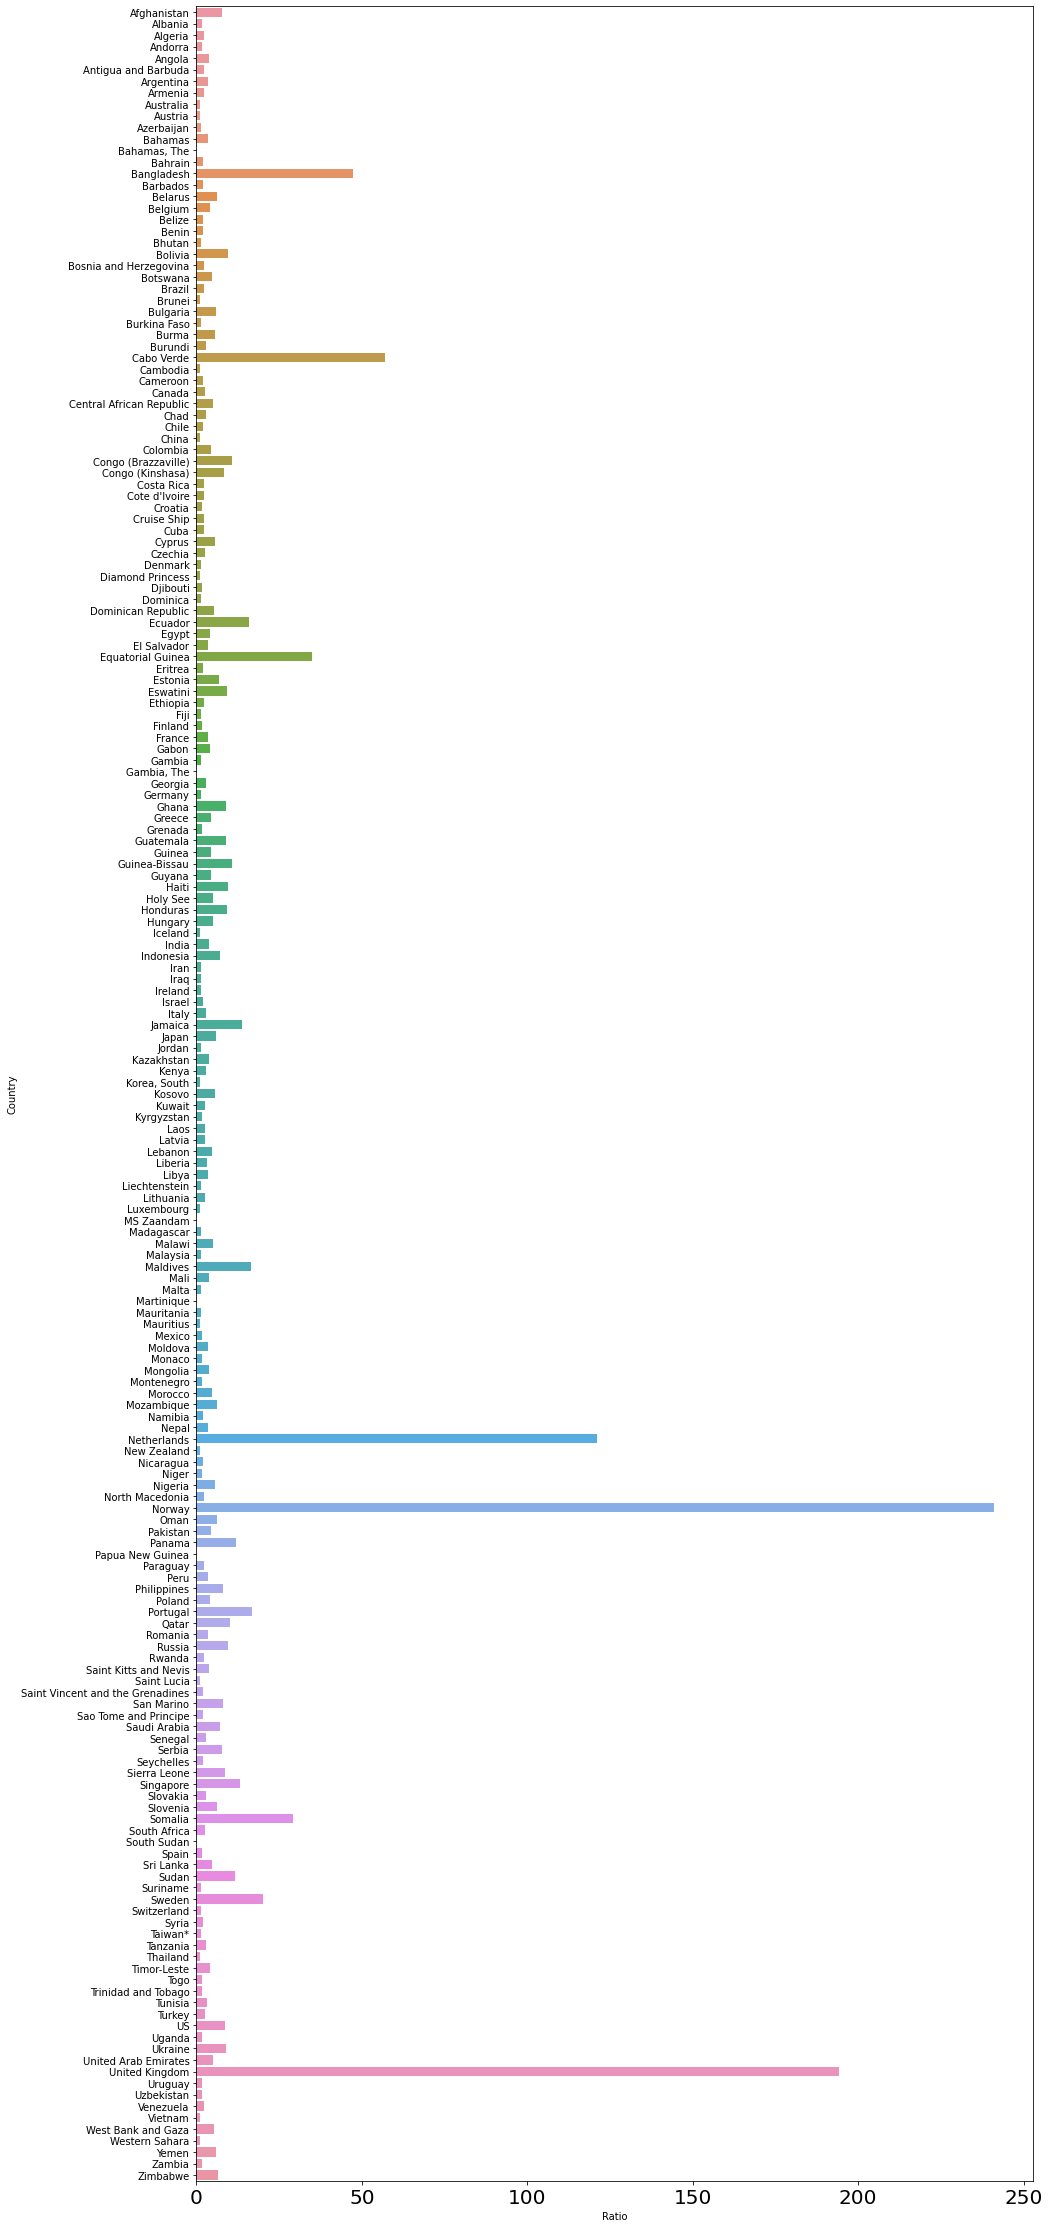

In [22]:
# plotting a bargraph with the above dataframe.

plt.figure(figsize=(15,40))
sns.barplot(x=data_fight["Ratio"], y=data_fight["Country"])
plt.yticks(size=10)
plt.xticks(size=20)

In [23]:
# sorting the dataframe with the least ratios.

data_top10 = data_fight.sort_values(by="Ratio", ascending=True)
data_top10.head(10)

,Country,Recovered,Confirmed,Ratio
31,Cambodia,119,122,1.025210
37,China,78474,83944,1.069705
80,Iceland,1656,1797,1.085145
114,Mauritius,306,334,1.091503
49,Diamond Princess,645,712,1.103876
169,Thailand,2665,2947,1.105816
25,Brunei,124,138,1.112903
145,Saint Lucia,15,17,1.133333
8,Australia,5715,6752,1.181452
93,"Korea, South",9059,10765,1.188321


In [24]:
# Here, we need to drop "Diamond Princess" beacause that's a cruising ship and and not a country. 

data_top10 = data_top10.drop(index=[49])
data_top10 = data_top10.head(10)

Text(0.5, 1.0, 'Countries vs ratio of confirmed cases to recoveries')

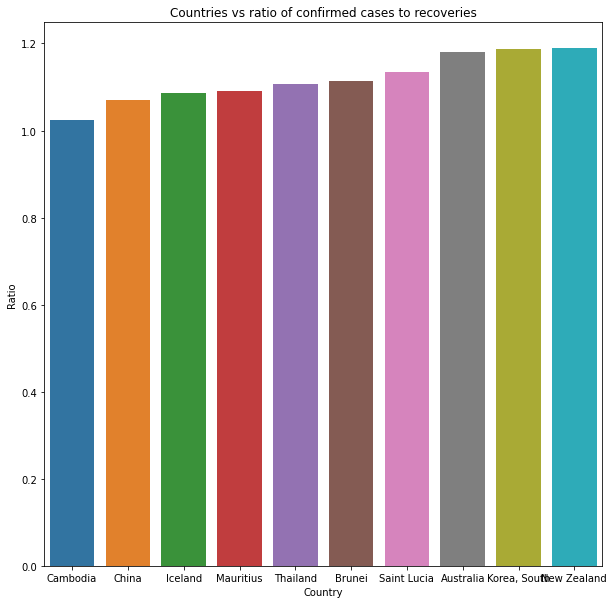

In [25]:
plt.figure(figsize=(10,10))
sns.barplot(x=data_top10["Country"], y=data_top10["Ratio"])
plt.title("Countries vs ratio of confirmed cases to recoveries")

These countries have maximium of their patients recovered.

Saint Lucia leading the list. Followed by China and Cambodia. 

# Analysing India's data: 

In [26]:
# Extracting country specific data.

data_india = data[data['Country']=="India"]
data_india

,Unnamed: 0,Country,Date,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered
4458,4459,India,2019-12-31,0,0,0,0,0,0
4459,4460,India,2020-01-01,0,0,0,0,0,0
4460,4461,India,2020-01-02,0,0,0,0,0,0
4461,4462,India,2020-01-03,0,0,0,0,0,0
4462,4463,India,2020-01-04,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
13676,78171,India,2020-04-25,26283,825,5939,1753,45,441
13677,78181,India,2020-04-26,27890,881,6523,1607,56,584
13678,78191,India,2020-04-27,29451,939,7137,1561,58,614
13679,78201,India,2020-04-28,31324,1008,7747,1873,69,610


In [27]:
# Confirmed cases in India in each day from 2019-12-31 to 2020-4-22.

india_confirmed = data_india.groupby("Date", as_index=False).Confirmed.sum()
india_confirmed

,Date,Confirmed
0,2019-12-31,0
1,2020-01-01,0
2,2020-01-02,0
3,2020-01-03,0
4,2020-01-04,0
...,...,...
116,2020-04-25,26283
117,2020-04-26,27890
118,2020-04-27,29451
119,2020-04-28,31324


Text(0.5, 1.0, "India's rising covid-19 cases")

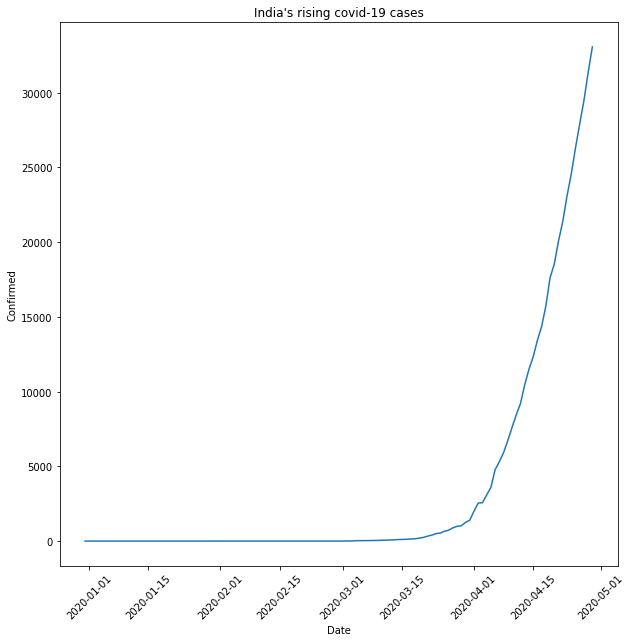

In [28]:
# Plotting the above dataframe in a line graph.

plt.figure(figsize=(10,10))
sns.lineplot(x=india_confirmed["Date"], y=india_confirmed["Confirmed"])
plt.xticks(rotation=45)
plt.title("India's rising covid-19 cases")

In [29]:
# # Recovered cases in India in each day from 2019-12-31 to 2020-4-22.

india_recover = data_india.groupby("Date", as_index=False).Recovered.sum()
india_recover

,Date,Recovered
0,2019-12-31,0
1,2020-01-01,0
2,2020-01-02,0
3,2020-01-03,0
4,2020-01-04,0
...,...,...
116,2020-04-25,5939
117,2020-04-26,6523
118,2020-04-27,7137
119,2020-04-28,7747


In [30]:
india_death = data_india.groupby("Date", as_index=False).Death.sum()
india_death

,Date,Death
0,2019-12-31,0
1,2020-01-01,0
2,2020-01-02,0
3,2020-01-03,0
4,2020-01-04,0
...,...,...
116,2020-04-25,825
117,2020-04-26,881
118,2020-04-27,939
119,2020-04-28,1008


Text(0, 0.5, 'no of cases')

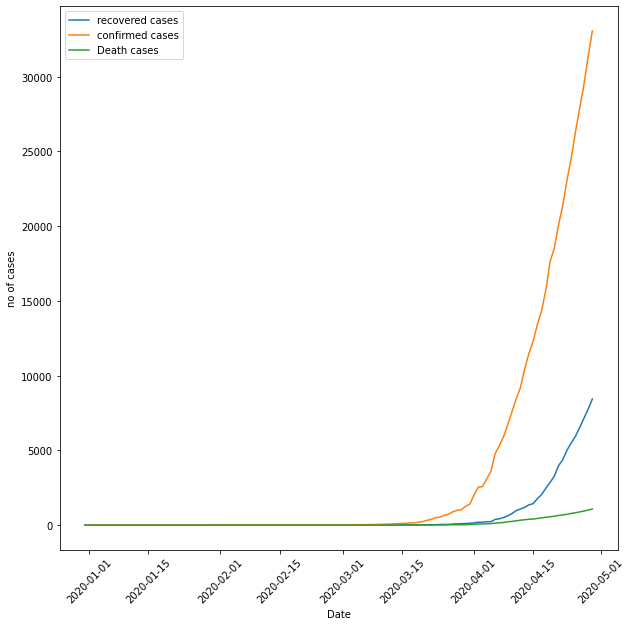

In [31]:
# plotting the above dataframes in a line graph. 

plt.figure(figsize=(10,10))
sns.lineplot(x=india_recover["Date"], y=india_recover["Recovered"], label="recovered cases")
sns.lineplot(x=india_confirmed["Date"], y=india_confirmed["Confirmed"], label="confirmed cases")
sns.lineplot(x=india_death["Date"], y=india_death["Death"], label="Death cases")
plt.xticks(rotation=45)
plt.ylabel("no of cases")

We see a steep rise in confirmed cases from 2020-03-15.

It seems like recovery rate is low but we need to consider the fact that a patient needs time to recover.

Also, the death rate is a lot low than the recovery rate.